In [1]:
using Pkg
Pkg.activate(".")

  Activating environment at `C:\Users\m163524\Dev\InterferometerSimulations\Project.toml`


In [2]:
using CairoMakie, BenchmarkTools
using InterferometerSimulations.Phantoms: ellipsoid, phantom_dataset
using InterferometerSimulations.PhaseStepping: sample_moire_pattern, phase_step

┌ Info: Precompiling InterferometerSimulations [e7baf0de-9a53-42e7-a5f6-a2b13beba9c7]
└ @ Base loading.jl:1317


In [3]:
# using Pkg
# Pkg.add(url="https://rohaslrailgit.mayo.edu/ctcic/mct-developement/gratinginterferometry.jl.git")

In [4]:
@btime ellipsoid();

  5.131 ms (4 allocations: 7.63 MiB)


In [5]:
@btime A = ellipsoid(N=256); 

  113.988 ms (4 allocations: 128.00 MiB)


In [6]:
A = ellipsoid(N=256);

This combinined with my python collab notebook would make for a nice blog post shown theadvantages of Julia. In python I had to go through the effort to make sure everything was usingnumpy vectorized operations to make it fast, which wasn't always possible in the case of making the3D volumes. Whereas with Julia, because it's compiled, even my first attempts are fast and all ofthe usual broadcasting and vectorization tricks that also make for shorter code are still here too.The outcome is fast code thats fast to write that really makes experimenting easier

In [7]:
project(A,dims=1) = sum(A, dims=dims)[1,:,:] 

project (generic function with 2 methods)

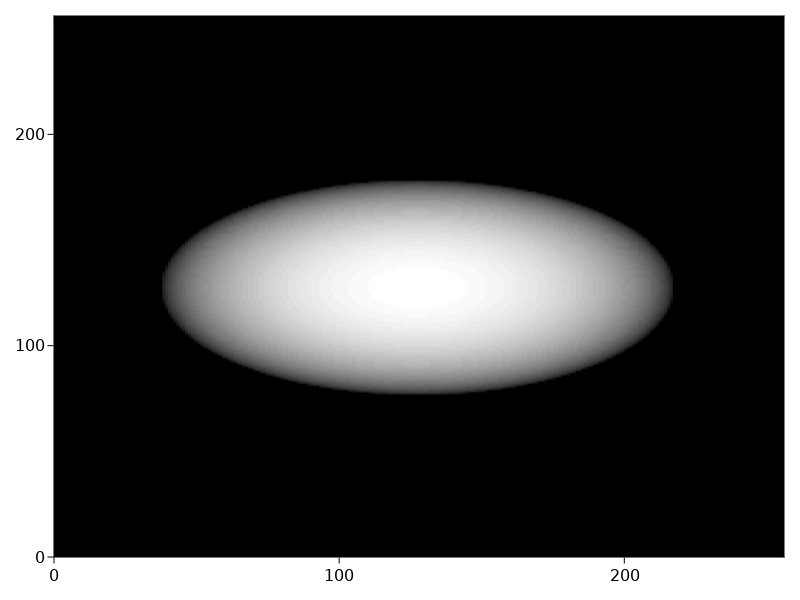

In [8]:
A = ellipsoid(foci=(0.5, 0.5, 0.5), axes=(0.2, 0.35, 0.2), N=256);
proj=project(A);
image(proj)

In [9]:
proj = phantom_dataset(A)

InterferometerSimulations.Phantoms.PhaseContrastData([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0])

In [10]:
using GratingInterferometry

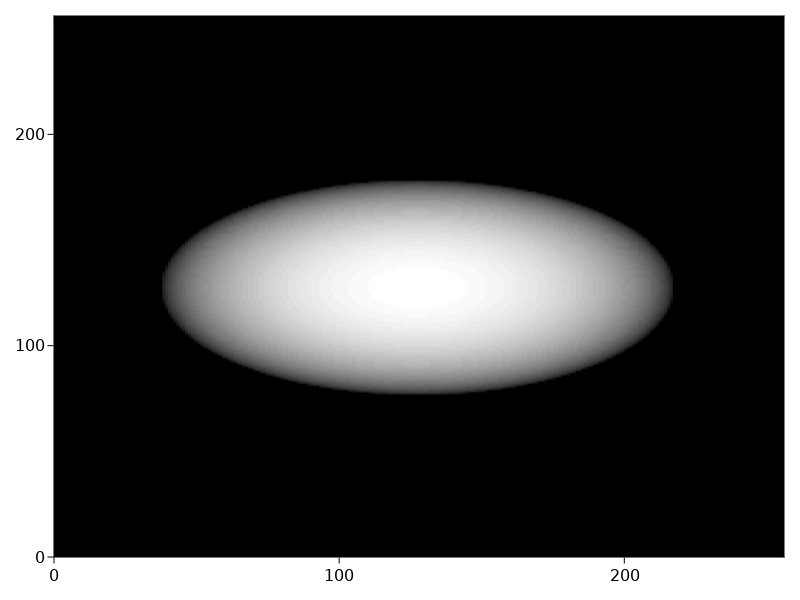

In [11]:
image(proj.atten) 

## Introduce Moire Sampling

In [12]:
M, N = size(proj)

(256, 256)

In [13]:
@btime lateral_position = [i/M for i = range(1, M, step=1), j = range(1, N, step=1)]';

  1.812 ms (65547 allocations: 1.50 MiB)


In [14]:
lateral_position = [i/M for i = range(1, M, step=1), j = range(1, N, step=1)]';

In [15]:
@btime sample_moire_pattern(proj);

  817.300 μs (31 allocations: 1.00 MiB)


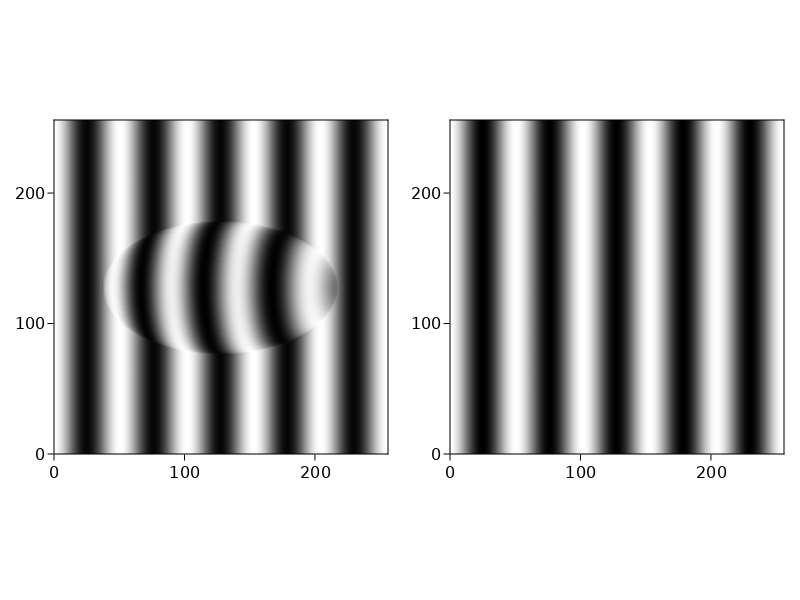

In [16]:
f = Figure()
Axis(f[1, 1], aspect = DataAspect())
image!(sample_moire_pattern(proj))
Axis(f[1, 2], aspect = DataAspect())
image!(sample_moire_pattern(proj, ref=true))
f

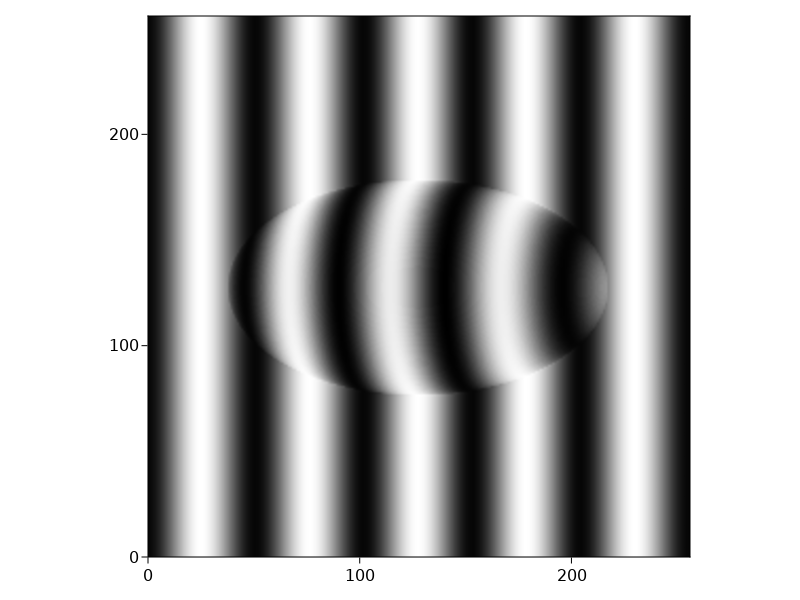

In [17]:
f = Figure()
Axis(f[1, 1], aspect = DataAspect())
image!(sample_moire_pattern(proj, 0.5))
f

In [18]:
ref = phase_step(proj, ref=true, nsteps=10)
obj = phase_step(proj, nsteps=10)
size(ref), size(obj)

((256, 256, 10), (256, 256, 10))

In [19]:
using GratingInterferometry: StepData
using GratingInterferometry.preprocessing: retrieve

In [20]:
steps = StepData(obj, ref)

StepData
obj of size: (256, 256, 10)
ref of size: (256, 256, 10)


In [21]:
proj = retrieve(steps)[1]

Projections
Ab of size: (256, 256, 1)
Δϕ of size: (256, 256, 1)
VN of size: (256, 256, 1)


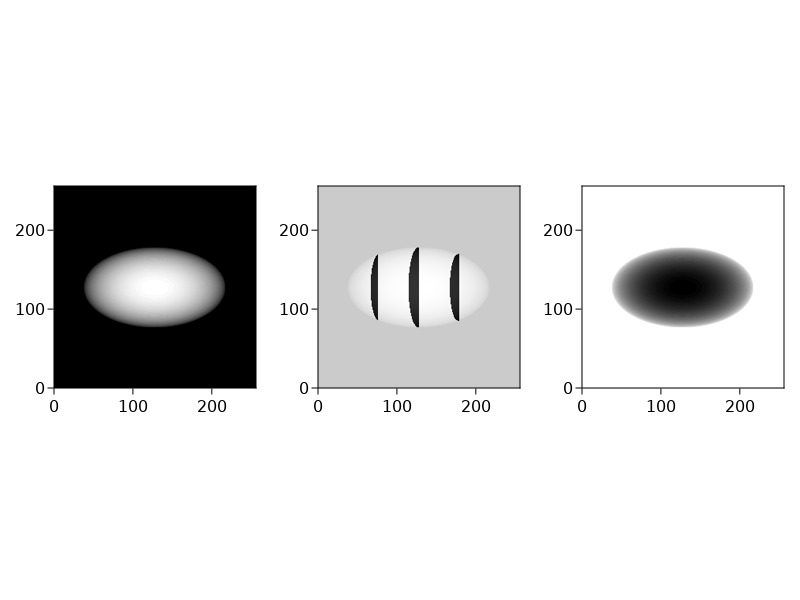

In [22]:
f = Figure()
Axis(f[1, 1], aspect = DataAspect())
image!(proj.Ab[:,:,1])
Axis(f[1, 2], aspect = DataAspect())
image!(proj.Δϕ[:,:,1])
Axis(f[1, 3], aspect = DataAspect())
image!(proj.VN[:,:,1])
f

In [23]:
using DSP

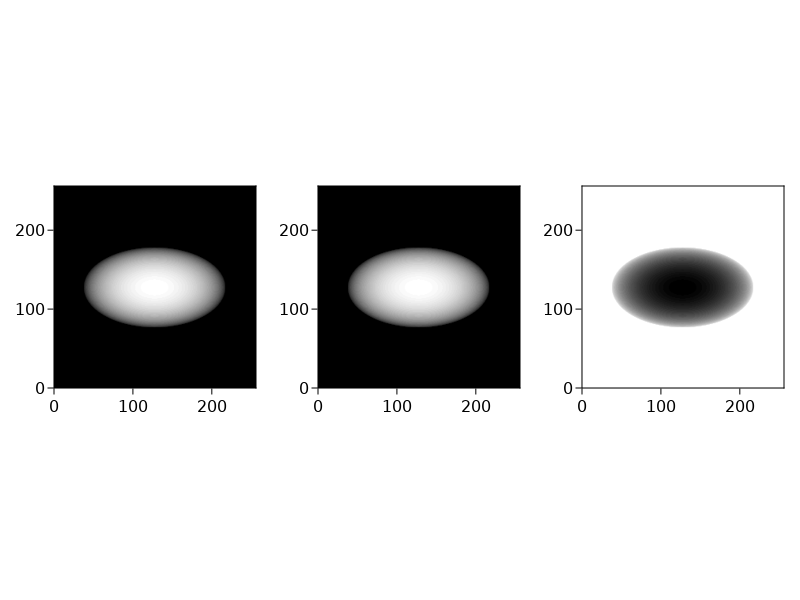

In [24]:
f = Figure()
Axis(f[1, 1], aspect = DataAspect())
image!(proj.Ab[:,:,1])
Axis(f[1, 2], aspect = DataAspect())
image!(unwrap(proj.Δϕ[:,:,1]))
Axis(f[1, 3], aspect = DataAspect())
image!(proj.VN[:,:,1])
f